In [2]:
import numpy as np
import pandas as pd

In [3]:
import chardet

# Detect encoding
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read(100000))  # read first 100 KB
    print(result['encoding'])


Windows-1252


In [4]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2025,ham,"Yes obviously, but you are the eggs-pert and t...",NaN,NaN,NaN
4907,ham,"I'm in solihull, | do you want anything?",NaN,NaN,NaN
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",NaN,NaN,NaN
5175,ham,Raji..pls do me a favour. Pls convey my Birthd...,NaN,NaN,NaN
5435,ham,I'm wif him now buying tix lar...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.sample(5)

,v1,v2
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5041,spam,Jamster! To get your free wallpaper text HEART...
1747,ham,I think u have the wrong number.
4764,ham,if you text on your way to cup stop that shoul...
3058,ham,"Dear all, as we know &lt;#&gt; th is the &lt..."


In [14]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2180,ham,Babe ! How goes that day ? What are you doing ...
3817,spam,74355 XMAS iscoming & ur awarded either å£500 ...
259,ham,I‰Û÷m parked next to a MINI!!!! When are you c...
1016,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
3007,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
# check for duplicate values
df.duplicated().sum()

403

In [20]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

2.EDA

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

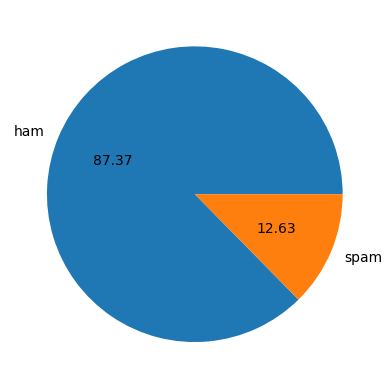

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
#DATA IS IMBALANCED
import nltk
nltk.download('punkt')
df['num_characters'] = df['text'].apply(len)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akkis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

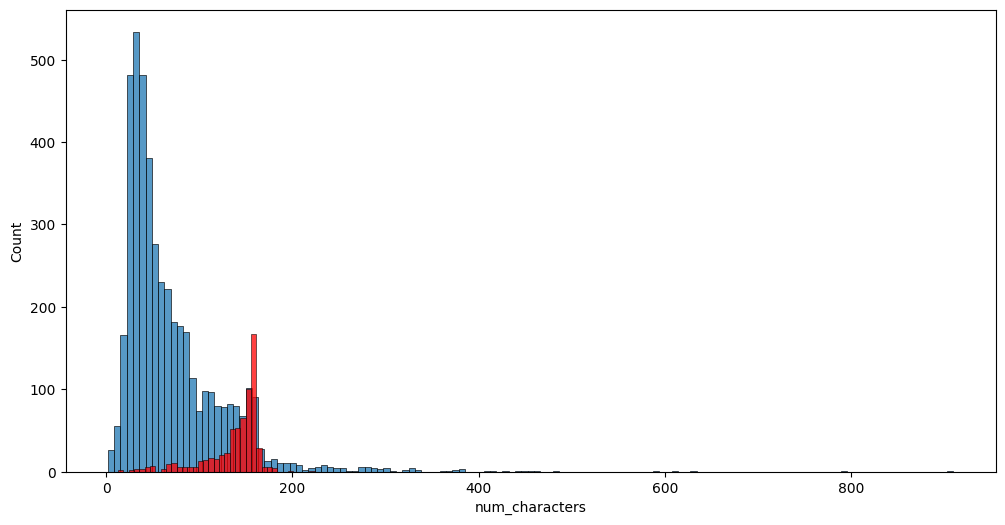

In [33]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

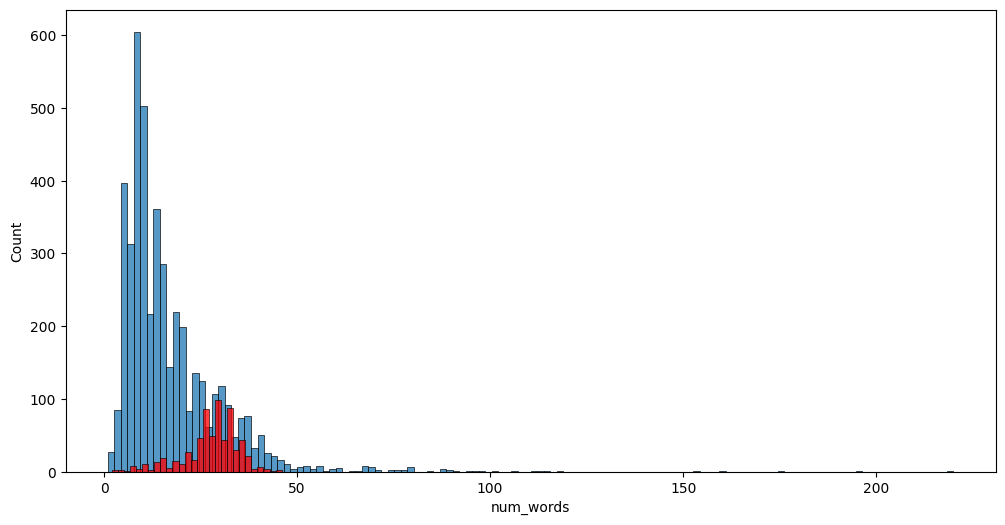

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

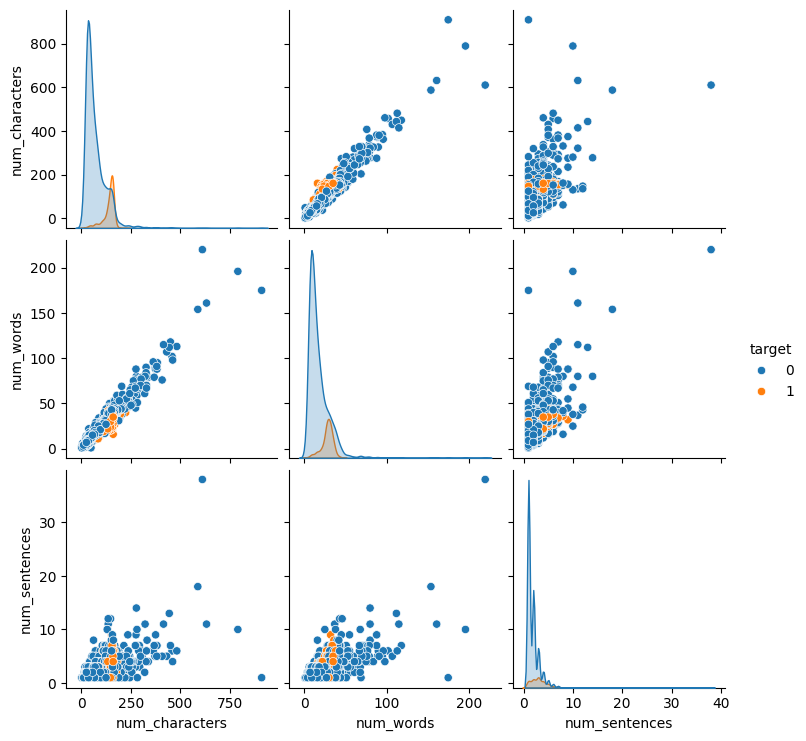

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

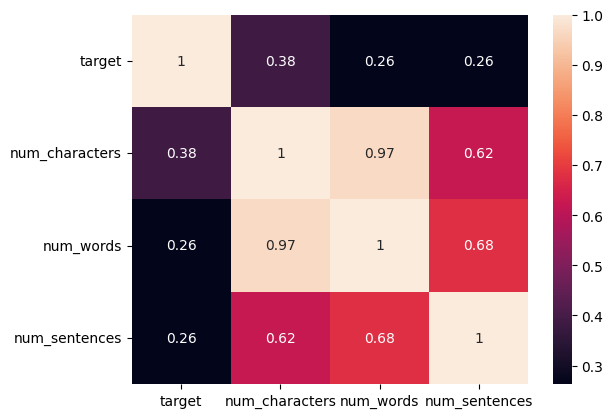

In [36]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data Preprocessing
   
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [37]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akkis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

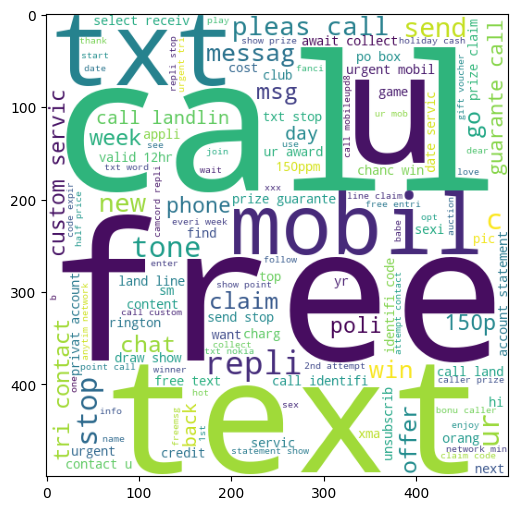

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

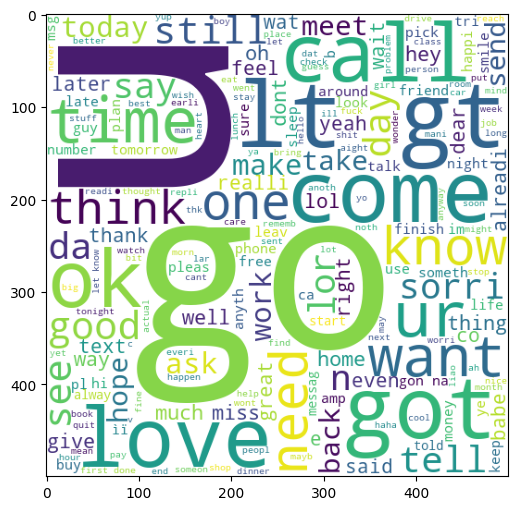

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

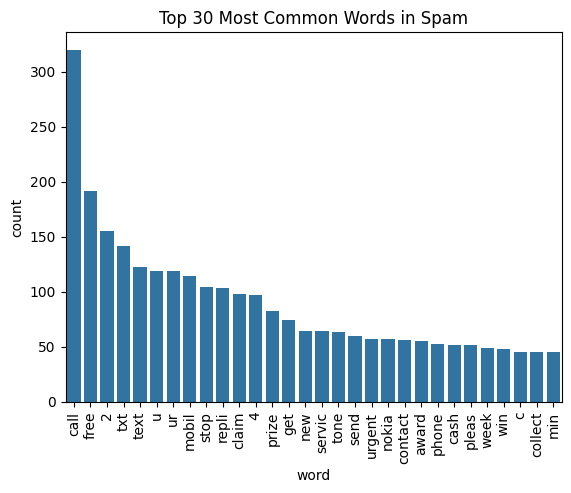

In [48]:
from collections import Counter
# Get top 30 most common words and their counts
common = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(common, columns=['word', 'count'])

# Now use keyword arguments
sns.barplot(x='word', y='count', data=df_common)

plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam')
plt.show()


In [49]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

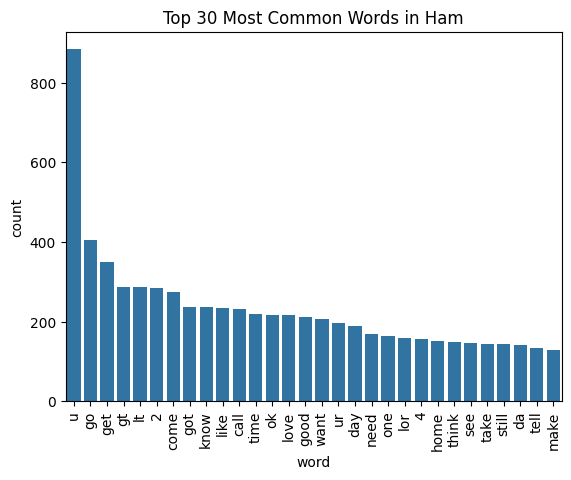

In [50]:
from collections import Counter
# Get top 30 most common words and their counts
common = Counter(ham_corpus).most_common(30)
df_common = pd.DataFrame(common, columns=['word', 'count'])

# Now use keyword arguments
sns.barplot(x='word', y='count', data=df_common)

plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham')
plt.show()


In [51]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##   4.Model Building

In [89]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [90]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [91]:
X.shape

(5169, 3000)

In [92]:
y = df['target'].values

In [93]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Step 1: After train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)





In [94]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
gnb.fit(X_train_resampled,y_train_resampled)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8568665377176016
[[781 122]
 [ 26 105]]
0.46255506607929514


In [96]:
mnb.fit(X_train_resampled,y_train_resampled)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9622823984526112
[[873  30]
 [  9 122]]
0.8026315789473685


In [97]:
bnb.fit(X_train_resampled,y_train_resampled)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[901   2]
 [ 14 117]]
0.9831932773109243


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [99]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [100]:
clfs = {
    'SVC' : svc,
    'KN' : knc,  
    'DT': dtc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [101]:
def train_classifier(clf,X_train_resampled,y_train_resampled,X_test,y_test):
    clf.fit(X_train_resampled,y_train_resampled)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [102]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train_resampled,y_train_resampled,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9632495164410058
Precision -  0.8297872340425532
For  KN
Accuracy -  0.9497098646034816
Precision -  0.9876543209876543
For  DT
Accuracy -  0.9052224371373307
Precision -  0.5964912280701754
For  AdaBoost
Accuracy -  0.9032882011605415
Precision -  0.593939393939394
For  BgC
Accuracy -  0.9264990328820116
Precision -  0.6708074534161491
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9216634429400387
Precision -  0.6470588235294118
For  xgb
Accuracy -  0.9516441005802708
Precision -  0.8045112781954887


In [103]:
a=[0.9622823984526112,0.9845261121856866]
p=[0.8026315789473685,0.9831932773109243]
for i in a:
    accuracy_scores.append(i)
for i in p:    
    precision_scores.append(i)
clfs["MnB"]='mnb'
clfs["BnB"]='bnb'

In [104]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [105]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.949710,0.987654
9,BnB,0.984526,0.983193
5,ETC,0.979691,0.982456
0,SVC,0.963250,0.829787
7,xgb,0.951644,0.804511
8,MnB,0.962282,0.802632
4,BgC,0.926499,0.670807
6,GBDT,0.921663,0.647059
2,DT,0.905222,0.596491
3,AdaBoost,0.903288,0.593939


In [106]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.949710
1,BnB,Accuracy,0.984526
2,ETC,Accuracy,0.979691
3,SVC,Accuracy,0.963250
4,xgb,Accuracy,0.951644
5,MnB,Accuracy,0.962282
6,BgC,Accuracy,0.926499
7,GBDT,Accuracy,0.921663
8,DT,Accuracy,0.905222
9,AdaBoost,Accuracy,0.903288


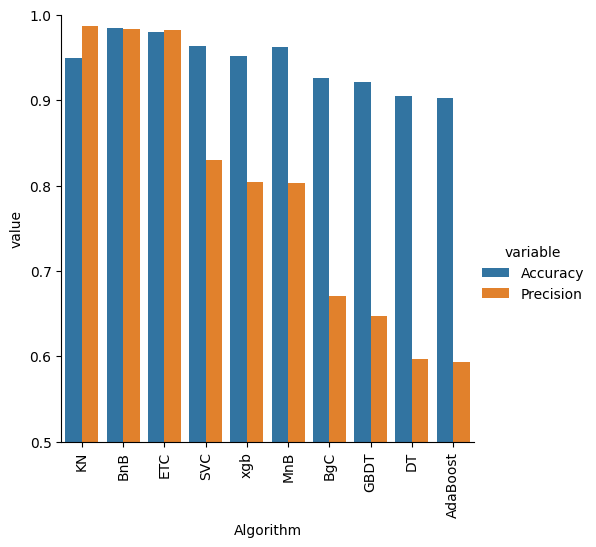

In [107]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [108]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [109]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [110]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [111]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [112]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [113]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [114]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.949710,0.987654,0.949710,0.987654,0.949710,0.987654,0.949710,0.987654
1,BnB,0.984526,0.983193,0.984526,0.983193,0.984526,0.983193,0.984526,0.983193
2,ETC,0.979691,0.982456,0.979691,0.982456,0.979691,0.982456,0.979691,0.982456
3,SVC,0.963250,0.829787,0.963250,0.829787,0.963250,0.829787,0.963250,0.829787
4,xgb,0.951644,0.804511,0.951644,0.804511,0.951644,0.804511,0.951644,0.804511
5,MnB,0.962282,0.802632,0.962282,0.802632,0.962282,0.802632,0.962282,0.802632
6,BgC,0.926499,0.670807,0.926499,0.670807,0.926499,0.670807,0.926499,0.670807
7,GBDT,0.921663,0.647059,0.921663,0.647059,0.921663,0.647059,0.921663,0.647059
8,DT,0.905222,0.596491,0.905222,0.596491,0.905222,0.596491,0.905222,0.596491
9,AdaBoost,0.903288,0.593939,0.903288,0.593939,0.903288,0.593939,0.903288,0.593939


In [115]:
# Voting Classifier
svc1 = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb1 = MultinomialNB()
etc1 = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc1), ('nb', mnb1), ('et', etc1)],voting='soft')

voting.fit(X_train_resampled,y_train_resampled)

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9796905222437138
Precision 0.9365079365079365


In [116]:
# Applying stacking
estimators=[('svm', svc1), ('nb', mnb1), ('et', etc1)]
final_estimator=RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train_resampled,y_train_resampled)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9632495164410058
Precision 1.0


In [117]:
import joblib

joblib.dump(tfidf, 'vectorizer.joblib')
joblib.dump(knc, 'model_knc.joblib')
joblib.dump(mnb, 'model_mnb.joblib')
joblib.dump(bnb, 'model_bnb.joblib')
joblib.dump(clf, 'model_stack.joblib')
joblib.dump(voting, 'model_vote.joblib')
joblib.dump(etc, 'model_etc.joblib')

['model_etc.joblib']

In [120]:
import pandas as pd

# Your list of messages
msg = [
    "Hey, are we still meeting for coffee at 5?",
    "You've won ₹1,00,000 in the BigBazaar lucky draw! Click here!",
    "Can you send me the notes from today's class?",
    "Urgent! Your KYC is pending. Click http://fakebank.link to verify.",
    "Happy birthday! Hope you have an amazing day 🎉",
    "Get a free recharge worth ₹50. Just reply WIN to 98765",
    "Where are you? We’re waiting at the mall.",
    "Claim your FREE movie tickets now! Limited offer only!",
    "Please bring the charger when you come.",
    "Congratulations! You have been selected for a cash reward. Call now!"
]

# List of model objects
model = [knc, mnb, gnb, clf, voting, etc]
model_names = ['knc', 'mnb', 'gnb', 'stacked', 'voting', 'etc']

# Store results per message
result_table = []

for i in msg:
    transformed_sms = transform_text(i)
    vector_input = tfidf.transform([transformed_sms])
    
    row = []
    for mdl in model:
        try:
            # Try dense input for models like SVC
            result = mdl.predict(vector_input.toarray())[0]
        except:
            # Fallback to sparse for models that support it
            result = mdl.predict(vector_input)[0]
        row.append("Spam" if result == 1 else "Not Spam")
    
    result_table.append(row)

# Create DataFrame with model names as columns and messages as index
a = pd.DataFrame(result_table, columns=model_names, index=msg)

# Display the DataFrame
print(a)


                                                         knc       mnb  \
Hey, are we still meeting for coffee at 5?          Not Spam  Not Spam   
You've won ₹1,00,000 in the BigBazaar lucky dra...  Not Spam      Spam   
Can you send me the notes from today's class?       Not Spam  Not Spam   
Urgent! Your KYC is pending. Click http://fakeb...  Not Spam      Spam   
Happy birthday! Hope you have an amazing day 🎉      Not Spam  Not Spam   
Get a free recharge worth ₹50. Just reply WIN t...  Not Spam      Spam   
Where are you? We’re waiting at the mall.           Not Spam  Not Spam   
Claim your FREE movie tickets now! Limited offe...  Not Spam      Spam   
Please bring the charger when you come.             Not Spam  Not Spam   
Congratulations! You have been selected for a c...  Not Spam      Spam   

                                                         gnb   stacked  \
Hey, are we still meeting for coffee at 5?          Not Spam  Not Spam   
You've won ₹1,00,000 in the BigBazaar

In [122]:
import pandas as pd
from IPython.display import display, HTML

# List of messages and their actual labels (0 = Ham, 1 = Spam)
msg = [
    "Hey, are we still meeting for coffee at 5?",
    "You've won ₹1,00,000 in the BigBazaar lucky draw! Click here!",
    "Can you send me the notes from today's class?",
    "Urgent! Your KYC is pending. Click http://fakebank.link to verify.",
    "Happy birthday! Hope you have an amazing day 🎉",
    "Get a free recharge worth ₹50. Just reply WIN to 98765",
    "Where are you? We’re waiting at the mall.",
    "Claim your FREE movie tickets now! Limited offer only!",
    "Please bring the charger when you come.",
    "Congratulations! You have been selected for a cash reward. Call now!"
]

original_labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # 0 = Ham, 1 = Spam
original_text = ["🟩 Ham" if label == 0 else "🟥 Spam" for label in original_labels]

# List of models and their names
model = [knc, mnb, gnb, clf, voting, etc]
model_names = ['KNN', 'MultinomialNB', 'BernoulliNB', 'Stacked', 'Voting', 'ExtraTrees']

# Collect results
results = []

for i, sentence in enumerate(msg):
    transformed = transform_text(sentence)
    vector_input = tfidf.transform([transformed])
    
    row = [sentence, original_text[i]]  # Start with sentence and original label
    
    for mdl in model:
        try:
            pred = mdl.predict(vector_input.toarray())[0]
        except:
            pred = mdl.predict(vector_input)[0]
        row.append("🟥 Spam" if pred == 1 else "🟩 Not Spam")
    
    results.append(row)

# Create DataFrame
columns = ['Message', 'Original'] + model_names
df = pd.DataFrame(results, columns=columns)

# Beautify table
styled_df = df.style.set_properties(**{
    'text-align': 'left',
    'font-family': 'monospace'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#444'), ('color', 'white'), ('text-align', 'left')]}
])

display(HTML("<h3>📊 SMS Spam Classification Results with Ground Truth</h3>"))
display(styled_df)


,Message,Original,KNN,MultinomialNB,BernoulliNB,Stacked,Voting,ExtraTrees
0,"Hey, are we still meeting for coffee at 5?",🟩 Ham,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam
1,"You've won ₹1,00,000 in the BigBazaar lucky draw! Click here!",🟥 Spam,🟩 Not Spam,🟥 Spam,🟥 Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam
2,Can you send me the notes from today's class?,🟩 Ham,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam
3,Urgent! Your KYC is pending. Click http://fakebank.link to verify.,🟥 Spam,🟩 Not Spam,🟥 Spam,🟥 Spam,🟥 Spam,🟥 Spam,🟥 Spam
4,Happy birthday! Hope you have an amazing day 🎉,🟩 Ham,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam
5,Get a free recharge worth ₹50. Just reply WIN to 98765,🟥 Spam,🟩 Not Spam,🟥 Spam,🟥 Spam,🟩 Not Spam,🟥 Spam,🟩 Not Spam
6,Where are you? We’re waiting at the mall.,🟩 Ham,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam
7,Claim your FREE movie tickets now! Limited offer only!,🟥 Spam,🟩 Not Spam,🟥 Spam,🟥 Spam,🟩 Not Spam,🟥 Spam,🟥 Spam
8,Please bring the charger when you come.,🟩 Ham,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam,🟩 Not Spam
9,Congratulations! You have been selected for a cash reward. Call now!,🟥 Spam,🟩 Not Spam,🟥 Spam,🟥 Spam,🟩 Not Spam,🟥 Spam,🟩 Not Spam
